### Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, homogeneity_completeness_v_measure


### Load Similarity Matrix

In [20]:
similarity_matrix = pd.read_csv("../results/similarity_matrix.csv", index_col=0)

### Convert to Distance Matrix

###### Since a dendrogram requires a distance matrix rather than a similarity matrix, we transform it by doing 1 - sim.

In [21]:
distance_matrix = 1 - similarity_matrix

In [22]:
distance_matrix

,adasen,bikolano,cebuano,chavacano,english,ilokano,ilonggo,kinaray-a,masbatenyo,paranan,romblomanon,spanish,tagalog,tausug,waray,yami
adasen,-1.110223e-15,8.541856e-01,8.527573e-01,9.542541e-01,9.835727e-01,5.802038e-01,8.539016e-01,8.888707e-01,8.541933e-01,0.828625,8.075257e-01,9.619463e-01,8.463123e-01,7.968686e-01,8.174149e-01,9.307293e-01
bikolano,8.541856e-01,-1.110223e-15,2.466507e-01,9.583356e-01,9.962480e-01,8.728004e-01,2.068473e-01,3.202490e-01,1.959424e-01,0.894492,2.788570e-01,9.700533e-01,2.679233e-01,8.058272e-01,3.014969e-01,9.303600e-01
cebuano,8.527573e-01,2.466507e-01,-8.881784e-16,9.725851e-01,9.964130e-01,8.885722e-01,2.003609e-01,3.486150e-01,2.381756e-01,0.912809,2.766490e-01,9.842721e-01,3.251082e-01,8.094311e-01,2.777251e-01,9.391819e-01
chavacano,9.542541e-01,9.583356e-01,9.725851e-01,-8.881784e-16,9.678147e-01,9.687739e-01,9.646516e-01,9.725569e-01,9.635082e-01,0.970783,9.635926e-01,3.063544e-01,8.292276e-01,9.612288e-01,9.755749e-01,9.630628e-01
english,9.835727e-01,9.962480e-01,9.964130e-01,9.678147e-01,-5.995204e-15,9.926200e-01,9.969097e-01,9.972083e-01,9.965574e-01,0.994340,9.684972e-01,9.668194e-01,9.967908e-01,9.956546e-01,9.947753e-01,9.887489e-01
ilokano,5.802038e-01,8.728004e-01,8.885722e-01,9.687739e-01,9.926200e-01,1.221245e-15,8.794749e-01,8.691151e-01,8.883786e-01,0.852963,8.873585e-01,9.696622e-01,8.840263e-01,9.090645e-01,8.914715e-01,9.053276e-01
ilonggo,8.539016e-01,2.068473e-01,2.003609e-01,9.646516e-01,9.969097e-01,8.794749e-01,-4.440892e-16,1.963898e-01,1.391369e-01,0.915653,1.737114e-01,9.781164e-01,2.753739e-01,8.629049e-01,1.973107e-01,9.378537e-01
kinaray-a,8.888707e-01,3.202490e-01,3.486150e-01,9.725569e-01,9.972083e-01,8.691151e-01,1.963898e-01,-2.886580e-15,3.095059e-01,0.923212,3.199952e-01,9.838308e-01,3.691275e-01,8.924863e-01,3.466987e-01,9.259567e-01
masbatenyo,8.541933e-01,1.959424e-01,2.381756e-01,9.635082e-01,9.965574e-01,8.883786e-01,1.391369e-01,3.095059e-01,-2.220446e-16,0.805497,2.232352e-01,9.439728e-01,3.115384e-01,7.794003e-01,2.603099e-01,9.370082e-01
paranan,8.286251e-01,8.944921e-01,9.128086e-01,9.707833e-01,9.943396e-01,8.529634e-01,9.156532e-01,9.232123e-01,8.054969e-01,0.000000,9.051391e-01,8.807579e-01,8.987055e-01,7.518157e-01,9.135816e-01,9.375631e-01


### Condensed Form

###### We need to transform the distance matrix to its condensed form as it is a requirement for scipy.cluser.hierarchy.linkage.

In [23]:
# ensure the diagonal of the distance matrix is zero
np.fill_diagonal(distance_matrix.values, 0)

# this is basically the upper triangle of the matrix, since its symmetrical
condensed_dist = squareform(distance_matrix.values)
condensed_dist

array([0.85418561, 0.85275735, 0.95425414, 0.98357273, 0.58020383,
       0.85390157, 0.88887065, 0.85419332, 0.82862506, 0.80752567,
       0.96194634, 0.84631231, 0.79686855, 0.8174149 , 0.93072932,
       0.24665069, 0.95833557, 0.99624796, 0.87280042, 0.20684733,
       0.32024898, 0.19594243, 0.89449213, 0.27885701, 0.97005333,
       0.26792331, 0.80582718, 0.30149686, 0.93035998, 0.97258513,
       0.99641297, 0.88857224, 0.20036091, 0.34861502, 0.23817557,
       0.91280856, 0.27664902, 0.98427207, 0.32510815, 0.80943105,
       0.27772514, 0.93918192, 0.96781468, 0.96877387, 0.96465164,
       0.97255687, 0.96350823, 0.97078328, 0.96359258, 0.30635438,
       0.82922761, 0.96122884, 0.97557485, 0.96306282, 0.99261997,
       0.99690972, 0.9972083 , 0.99655742, 0.99433961, 0.96849722,
       0.96681942, 0.99679079, 0.99565459, 0.99477526, 0.98874888,
       0.87947492, 0.86911511, 0.88837856, 0.85296339, 0.88735848,
       0.96966218, 0.88402631, 0.90906454, 0.89147148, 0.90532

### Hierarchical Clustering (Linkage)

In [24]:
Z = linkage(condensed_dist, method='average')  # average linkage is common for similarity data

In [25]:
Z

# compute the cophenetic correlation coefficient to measure how faithfully the dendrogram represents the pairwise distances
coph_corr, coph_dists = cophenet(Z, condensed_dist)
coph_corr

np.float64(0.99178273359868)

In [26]:
# we will compute the optimal k using silhouette scores so we know how to cluster the dendrogram

silhouette_scores = []
language_names = similarity_matrix.index.to_list()

# test k from 2 clusters up to 10
k_range = range(2, 11)

for k in k_range:
    # cut the tree (Z) to get k clusters
    labels = fcluster(Z, k, criterion='maxclust')
    
    # calculate the silhouette score.
    # uses square 'distance_matrix' and metric='precomputed'
    score = silhouette_score(distance_matrix, labels, metric='precomputed')
    silhouette_scores.append(score)
    print(f"For k = {k}, the average Silhouette Score is: {score:.4f}")

# find the k that gave the highest score
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nBest k based on highest Silhouette Score: {best_k}")

For k = 2, the average Silhouette Score is: 0.2492
For k = 3, the average Silhouette Score is: 0.3359
For k = 4, the average Silhouette Score is: 0.3429
For k = 5, the average Silhouette Score is: 0.4476
For k = 6, the average Silhouette Score is: 0.4746
For k = 7, the average Silhouette Score is: 0.4550
For k = 8, the average Silhouette Score is: 0.4175
For k = 9, the average Silhouette Score is: 0.1684
For k = 10, the average Silhouette Score is: 0.1504

Best k based on highest Silhouette Score: 6


In [27]:
# get the final cluster labels using the best k

final_labels = fcluster(Z, best_k, criterion='maxclust')

language_names = similarity_matrix.index.to_list()

# match labels back to language names
clusters = pd.DataFrame({'Language': language_names, 'Cluster': final_labels})

print(f"Final Clusters (k={best_k})")
for i in range(1, best_k + 1):
    print(f"\nCluster {i}:")
    langs_in_cluster = clusters[clusters['Cluster'] == i]['Language']
    print(langs_in_cluster.to_string(index=False))

Final Clusters (k=6)

Cluster 1:
chavacano
  spanish

Cluster 2:
   bikolano
    cebuano
    ilonggo
  kinaray-a
 masbatenyo
romblomanon
    tagalog
      waray

Cluster 3:
 adasen
ilokano

Cluster 4:
paranan
 tausug

Cluster 5:
yami

Cluster 6:
english


In [28]:
clusters

,Language,Cluster
0,adasen,3
1,bikolano,2
2,cebuano,2
3,chavacano,1
4,english,6
5,ilokano,3
6,ilonggo,2
7,kinaray-a,2
8,masbatenyo,2
9,paranan,4


### Visualization/s

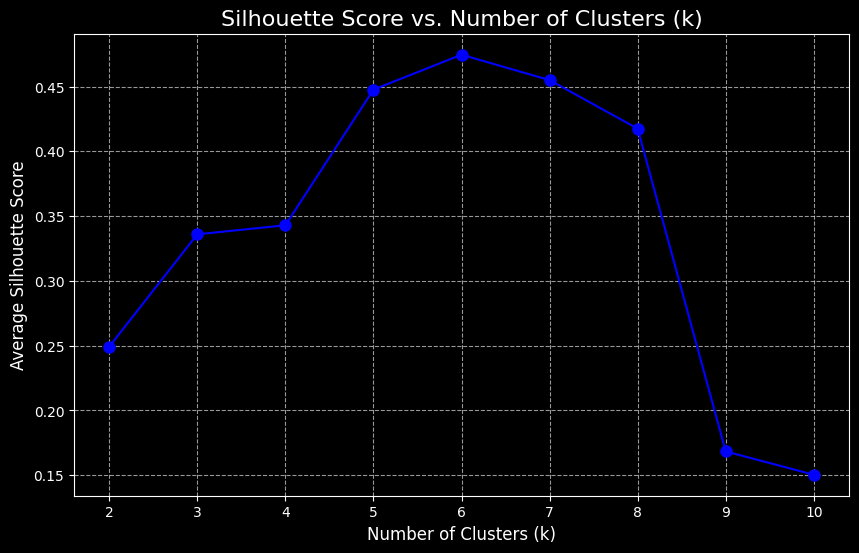

In [29]:
plt.style.use("dark_background")  
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', markersize=8)

plt.title('Silhouette Score vs. Number of Clusters (k)', fontsize=16, color="white")
plt.xlabel('Number of Clusters (k)', fontsize=12, color="white")
plt.ylabel('Average Silhouette Score', fontsize=12, color="white")
plt.xticks(k_range, color="white")
plt.yticks(color="white")
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig("../results/silhouette_plot.png", dpi=300, bbox_inches="tight")
plt.show()

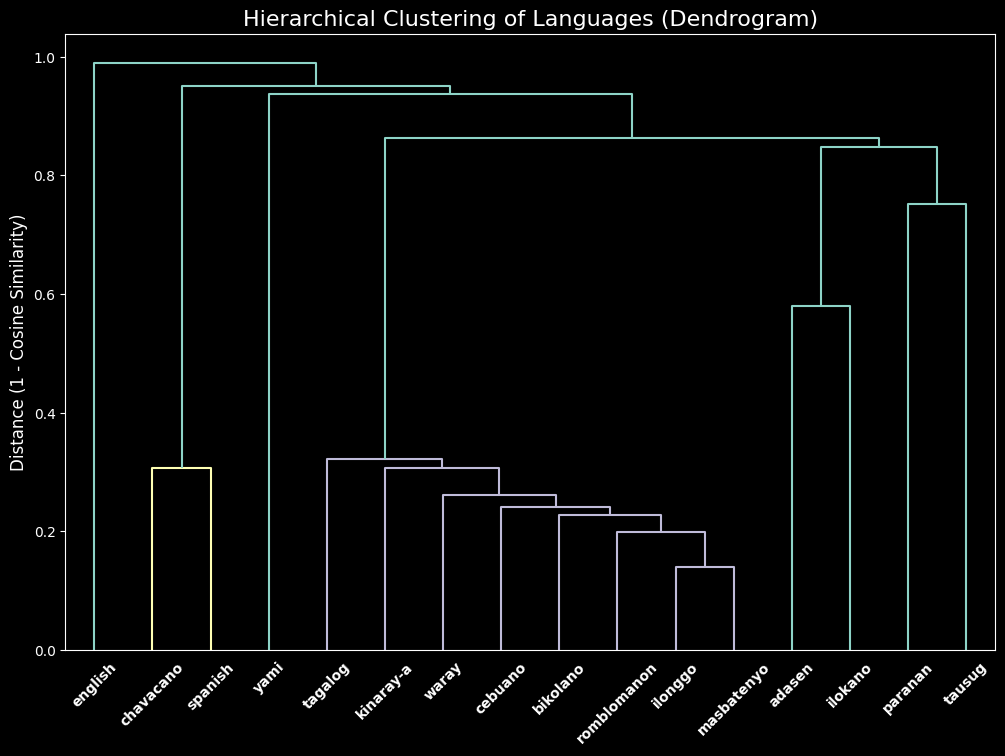

In [30]:
plt.style.use("dark_background")  
plt.figure(figsize=(12, 8))

dendrogram(
    Z,
    labels=similarity_matrix.index.to_list(),
    leaf_rotation=45,
    leaf_font_size=12,
    color_threshold=0.4,  
)

plt.title("Hierarchical Clustering of Languages (Dendrogram)", fontsize=16, color="white")
plt.ylabel("Distance (1 - Cosine Similarity)", fontsize=12, color="white")
plt.xticks(fontsize=10, fontweight="semibold", color="white")
plt.yticks(fontsize=10, color="white")

plt.savefig("../results/dendrogram.png", dpi=300, bbox_inches="tight")
plt.show()

Calculated color threshold for k=6: 0.7993


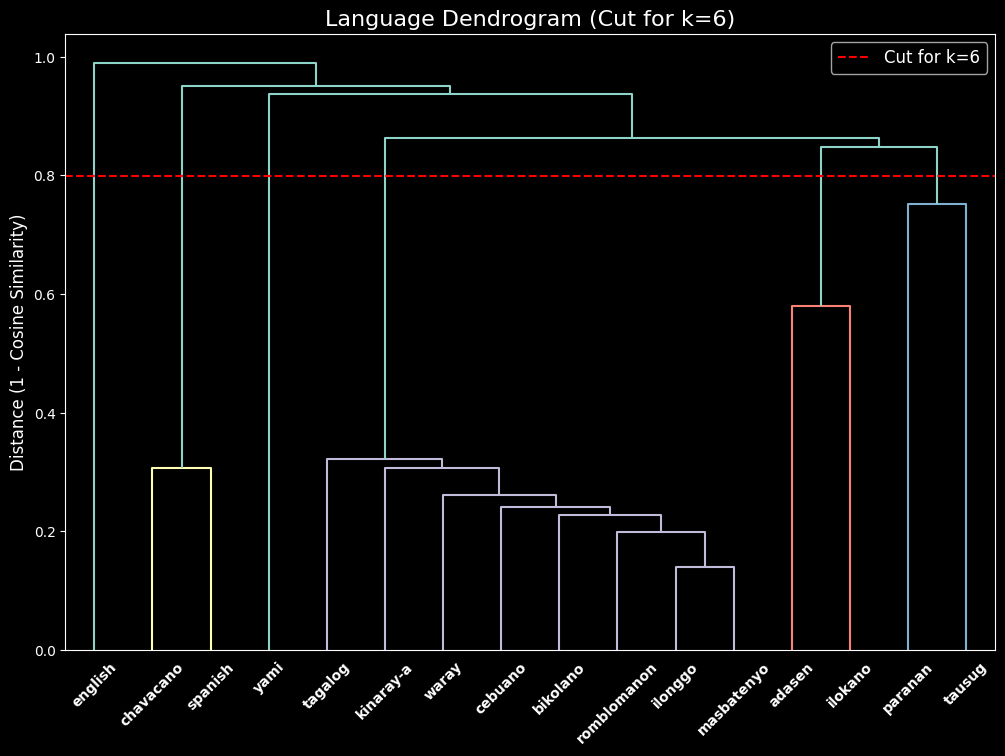

In [31]:
N = len(language_names)

# get the distance of the merge that creates (k-1) clusters
merge_dist_k_minus_1 = Z[N - best_k, 2]

# get the distance of the merge that creates k clusters
merge_dist_k = Z[N - (best_k + 1), 2]

# threshold should be between these two distances
color_thresh = (merge_dist_k_minus_1 + merge_dist_k) / 2

print(f"Calculated color threshold for k={best_k}: {color_thresh:.4f}")
plt.style.use("dark_background")  
plt.figure(figsize=(12, 8))

dendrogram(
    Z,
    labels=language_names,
    leaf_rotation=45,
    leaf_font_size=12,
    color_threshold=color_thresh, 
)

plt.title(f"Language Dendrogram (Cut for k={best_k})", fontsize=16, color="white")
plt.ylabel("Distance (1 - Cosine Similarity)", fontsize=12, color="white")
plt.xticks(fontsize=10, fontweight="semibold", color="white")
plt.yticks(fontsize=10, color="white")

plt.axhline(y=color_thresh, color='r', linestyle='--', label=f'Cut for k={best_k}')
plt.legend(fontsize=12)

plt.savefig(f"../results/dendrogram_k{best_k}.png", dpi=300, bbox_inches="tight")
plt.show()

### Evaluation

In [ ]:
predicted_clusters = final_labels

# Gold standard language family labels based on Ethnologue classifications
gold_labels = [
    2,  # adasen (Northern Luzon)
    1,  # bikolano (Greater Central Philippine)
    1,  # cebuano (Greater Central Philippine)
    4,  # chavacano (Spanish-Based Creole)
    5,  # english (Indo-European/Germanic)
    2,  # ilokano (Northern Luzon)
    1,  # ilonggo (Greater Central Philippine)
    1,  # kinaray-a (Greater Central Philippine)
    1,  # masbatenyo (Greater Central Philippine)
    2,  # paranan (Northern Luzon)
    1,  # romblomanon (Greater Central Philippine)
    4,  # spanish (Indo-European/Romance)
    1,  # tagalog (Greater Central Philippine)
    1,  # tausug (Greater Central Philippine)
    1,  # waray (Greater Central Philippine)
    3   # yami (Bashiic)
]

In [33]:
ari = adjusted_rand_score(gold_labels, predicted_clusters)
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(gold_labels, predicted_clusters)

In [34]:
print("Cluster Evaluation")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Homogeneity: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"V-measure: {v_measure:.3f}")

if ari > 0.6:
    ari_msg = "Strong alignment between predicted clusters and known language families."
elif ari > 0.3:
    ari_msg = "Moderate overlap; clusters capture some linguistic structure but with mixing."
else:
    ari_msg = "Weak correspondence; clusters diverge from established classifications."

print(f"Interpretation: {ari_msg}")

Cluster Evaluation
Adjusted Rand Index (ARI): 0.781
Homogeneity: 0.930
Completeness: 0.786
V-measure: 0.852
Interpretation: Strong alignment between predicted clusters and known language families.
